# Introdução

A análise abaixo foi feita utilizando dados do da prefeitura do Recife que foram disponibilizadps no site (http://dados.recife.pe.gov.br/it/dataset/destinacao-de-residuos-solidos)


# Motivação
A motivação para este projeto é para treinar minha cocepção e conhecimentos com análise de dados com python, bibliotecas relacionadas e jupyter. Quero aprender novos conceitos como tratamento de dados, visão análitica e exploratória além de ter uma boa análise Estátisca com esse projeto.

# Perguntas que tentarei responder através da análise
- Qual é a distribuição dos tipos de resíduos descartados nas ecoestações e econúcleos?; 
- Qual é a distribuição dos tipos de resíduos descartados nas ecoestações e econúcleos?;
- Qual é a localização geográfica das ecoestações e econúcleos?;
- Qual é a média de resíduos descartados por dia em cada ecoestação e econúcleo?;
- Existe uma correlação entre a localização das ecoestações/econúcleos e o perfil socioeconômico das áreas circundantes?; 
- Entre outras perguntas que podem surgir


# Objetivo
O objetivo principal é obter insights que possam informar políticas públicas, estratégias de gestão de resíduos e programas de educação ambiental, visando reduzir o impacto ambiental do descarte inadequado e promover a sustentabilidade.

# Conclusão
 Ao responder às perguntas acima e analisar os dados, esperamos obter uma compreensão mais profunda do sistema de descarte de resíduos na comunidade, identificar áreas de intervenção prioritárias e desenvolver estratégias eficazes para promover a gestão sustentável de resíduos e a conscientização ambiental.


# 1. Imports

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carregando DataSet

In [107]:
df = pd.read_csv("../dataset/2f3a8820-8680-4768-9f27-b5105239482a.csv")
df.head()

,_id,tiporesiduo,nome,bairro,localizacao,endereco,complemento,observacao,latitude,longitude,residuo_construcao_civil,residuo_solido_organico,residuo_volumoso,residuo_reciclavel
0,1,Materiais Recicláveis,Cooperativa,São José,Avenida Sul,Avenida Sul,s/n,Cooperativa,-8.075631,-34.891624,NÃO,NÃO,NÃO,SIM
1,2,Materiais Recicláveis,Cooperativa,São José,Avenida Sul,Avenida Sul,s/n,Cooperativa,-8.075631,-34.891624,NÃO,NÃO,NÃO,SIM
2,3,Materiais Recicláveis,Cooperativa,Dois Unidos,Av. Chagas Ferreira,Av. Chagas Ferreira,601,Cooperativa,-8.005045,-34.912247,NÃO,NÃO,NÃO,SIM
3,4,Materiais Recicláveis,Cooperativa,Torre,Rua Eliezer Olímpio de Moura,Rua Eliezer Olímpio de Moura,100,Cooperativa,-8.044426,-34.912990,NÃO,NÃO,NÃO,SIM
4,5,Materiais Recicláveis,Cooperativa,São José,Travessa do Gusmão,Travessa do Gusmão,178,Cooperativa,-8.071821,-34.886728,NÃO,NÃO,NÃO,SIM


# 3. Tratamento dos dados

In [108]:
df.shape

(79, 14)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       79 non-null     int64  
 1   tiporesiduo               79 non-null     object 
 2   nome                      79 non-null     object 
 3   bairro                    19 non-null     object 
 4   localizacao               79 non-null     object 
 5   endereco                  79 non-null     object 
 6   complemento               11 non-null     object 
 7   observacao                79 non-null     object 
 8   latitude                  79 non-null     float64
 9   longitude                 79 non-null     float64
 10  residuo_construcao_civil  79 non-null     object 
 11  residuo_solido_organico   79 non-null     object 
 12  residuo_volumoso          79 non-null     object 
 13  residuo_reciclavel        79 non-null     object 
dtypes: float64(2

In [110]:
# VARIAVEL 'COMPLEMENTO' ESTÁ COMO OBJECT. PASSA-LÁ PARA FLOAT OU INTEIRO
df.groupby(["complemento"]).size()

#Preciso fazer o tratamento dos dados, observe que tem um valor inserido como sem valor 's/n'

# A primeira forma seria excluir todo o registro(coluna), porém isso resultaria em uma perda de dados
# df.drop(df.Loc[df["complemento"] == "s/n"].index, inplace=True)

complemento
100    1
150    1
178    1
483    1
601    1
s/n    6
dtype: int64

In [111]:
# A segunda forma é verificar o valor médio oy da mediana deste modelo e substituir a palvra S/N para um valor médio

#loc filtrar valores, filtrar condições, substituir valores/ iloc é pelo indice
df.loc[df["complemento"] == "s/n"]

,_id,tiporesiduo,nome,bairro,localizacao,endereco,complemento,observacao,latitude,longitude,residuo_construcao_civil,residuo_solido_organico,residuo_volumoso,residuo_reciclavel
0,1,Materiais Recicláveis,Cooperativa,São José,Avenida Sul,Avenida Sul,s/n,Cooperativa,-8.075631,-34.891624,NÃO,NÃO,NÃO,SIM
1,2,Materiais Recicláveis,Cooperativa,São José,Avenida Sul,Avenida Sul,s/n,Cooperativa,-8.075631,-34.891624,NÃO,NÃO,NÃO,SIM
5,6,Materiais Recicláveis,Cooperativa,Guabiraba,Av. Padre Mosca de Carvalho,Av. Padre Mosca de Carvalho,s/n,Cooperativa,-7.964258,-34.924600,NÃO,NÃO,NÃO,SIM
6,7,Materiais Recicláveis,Cooperativa,Arruda,Avenida Professor José dos Anjos,Avenida Professor José dos Anjos,s/n,Cooperativa,-8.020267,-34.874597,NÃO,NÃO,NÃO,SIM
7,8,Materiais Recicláveis,Cooperativa,São José,Rua Pacatuba,Rua Pacatuba,s/n,Cooperativa,-8.076567,-34.897539,NÃO,NÃO,NÃO,SIM
8,9,Materiais Recicláveis,Cooperativa,São José,Rua Oscar de Melo,Rua Oscar de Melo,s/n,Cooperativa,-8.077965,-34.899157,NÃO,NÃO,NÃO,SIM


In [112]:
# Agora substituímos a palavra s/n por 0
df.loc[(df["complemento"] == "s/n"), "complemento"] = 0

# Em seguida convertemos o campo em float
df["complemento"] = df["complemento"].astype(np.float64)

#Pronto

In [113]:
# Verificar se há valores nulos, ou seja, há 60 valores nulos em bairro. Fazer o tratamento
df.isnull().sum()

_id                          0
tiporesiduo                  0
nome                         0
bairro                      60
localizacao                  0
endereco                     0
complemento                 68
observacao                   0
latitude                     0
longitude                    0
residuo_construcao_civil     0
residuo_solido_organico      0
residuo_volumoso             0
residuo_reciclavel           0
dtype: int64

In [114]:
# Uma forma bem mais simples de tratarmos o dado é utilizar direto a função FILLNA preenchendo os valores em branco 
# com a mediana
df["complemento"] = df["complemento"].fillna((df["complemento"].median()))

#No caso de Strings, substitua os valores nulos para outra palavra
df["bairro"] = df["bairro"].fillna("Desconhecido")

In [115]:
# Observe que não há mais valores nulos
df.isnull().sum()

_id                         0
tiporesiduo                 0
nome                        0
bairro                      0
localizacao                 0
endereco                    0
complemento                 0
observacao                  0
latitude                    0
longitude                   0
residuo_construcao_civil    0
residuo_solido_organico     0
residuo_volumoso            0
residuo_reciclavel          0
dtype: int64

In [116]:
# Vamos avaliar novamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       79 non-null     int64  
 1   tiporesiduo               79 non-null     object 
 2   nome                      79 non-null     object 
 3   bairro                    79 non-null     object 
 4   localizacao               79 non-null     object 
 5   endereco                  79 non-null     object 
 6   complemento               79 non-null     float64
 7   observacao                79 non-null     object 
 8   latitude                  79 non-null     float64
 9   longitude                 79 non-null     float64
 10  residuo_construcao_civil  79 non-null     object 
 11  residuo_solido_organico   79 non-null     object 
 12  residuo_volumoso          79 non-null     object 
 13  residuo_reciclavel        79 non-null     object 
dtypes: float64(3

In [117]:
# Vamos analisar os outliers das colunas númericas
#outliers são valores discrepantes um dos outros ex: 10-500

numeros = []

for i in df.columns[0:78].tolist():
    if df.dtypes[i] == "int64" or df.dtypes[i] == "float64":
        print(i, ":", df.dtypes[i])
        numeros.append(i)

_id : int64
complemento : float64
latitude : float64
longitude : float64


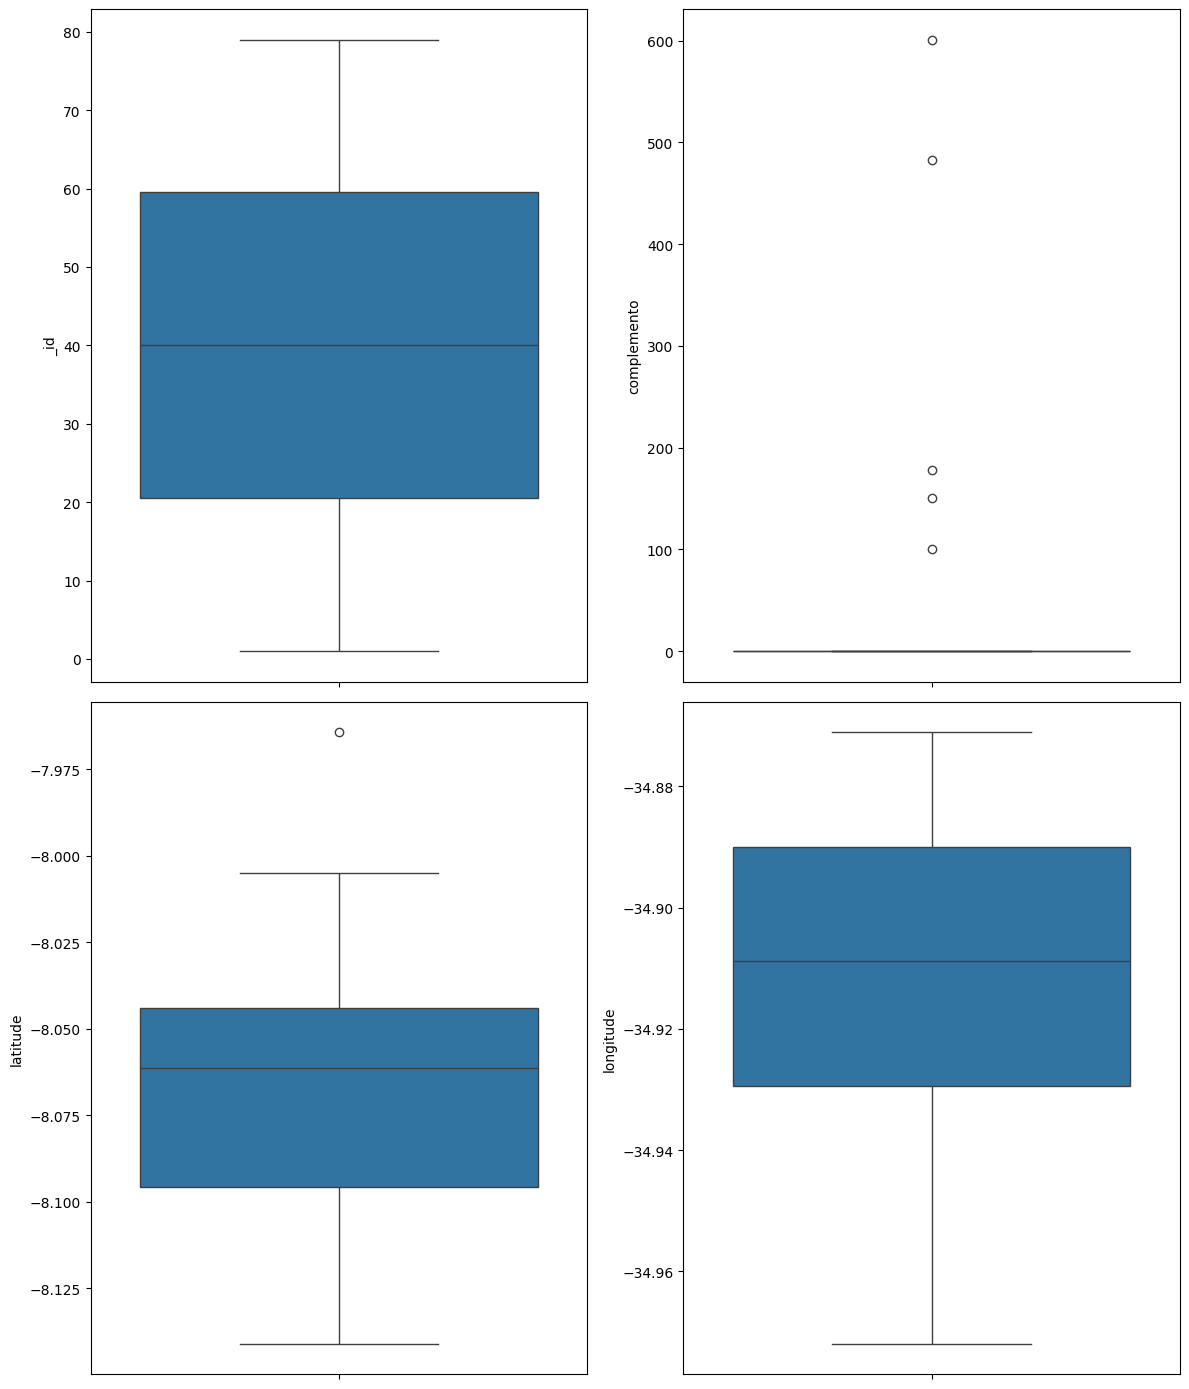

In [118]:
# Para cada variavel que for passando no for, vai montando um grafo
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True

#Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2,2) #2 linhas e 2 colunas PELO FATO DE HAVER 4 AMOSTRAS

linha = 0
coluna = 0


for i in numeros:
    sns.boxplot(data = df, y = i, ax = axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()



# Boxplots
# Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, 
# e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, 
# o intervalo interquartil(IQR) e outliers para cada variável. 

# Outlier são valores que estão bem discrepantes dentro do conjunto de dados, podem ser para mais ou para menos. 
# Observe nos DOIS ULTIMOS boxplot que há os pontinhos acima das linhas. Esses valores são outliers

In [119]:
# Se não houver outliers nas variaveis, logo não precisam ser tratados(LATITUDE NAO PODE SER MODIFICADO)

#CASO houvesse poderiamos filtrar esse valor. Ou seja, listar esses valores:
df.loc[df["complemento"] > 500]
# Se for um único(ou muito poucos comparados com a massa) valor, vale a consideração de excluir esse dados
df.drop(df.loc[df["complemento"] > 600].index, inplace= True)

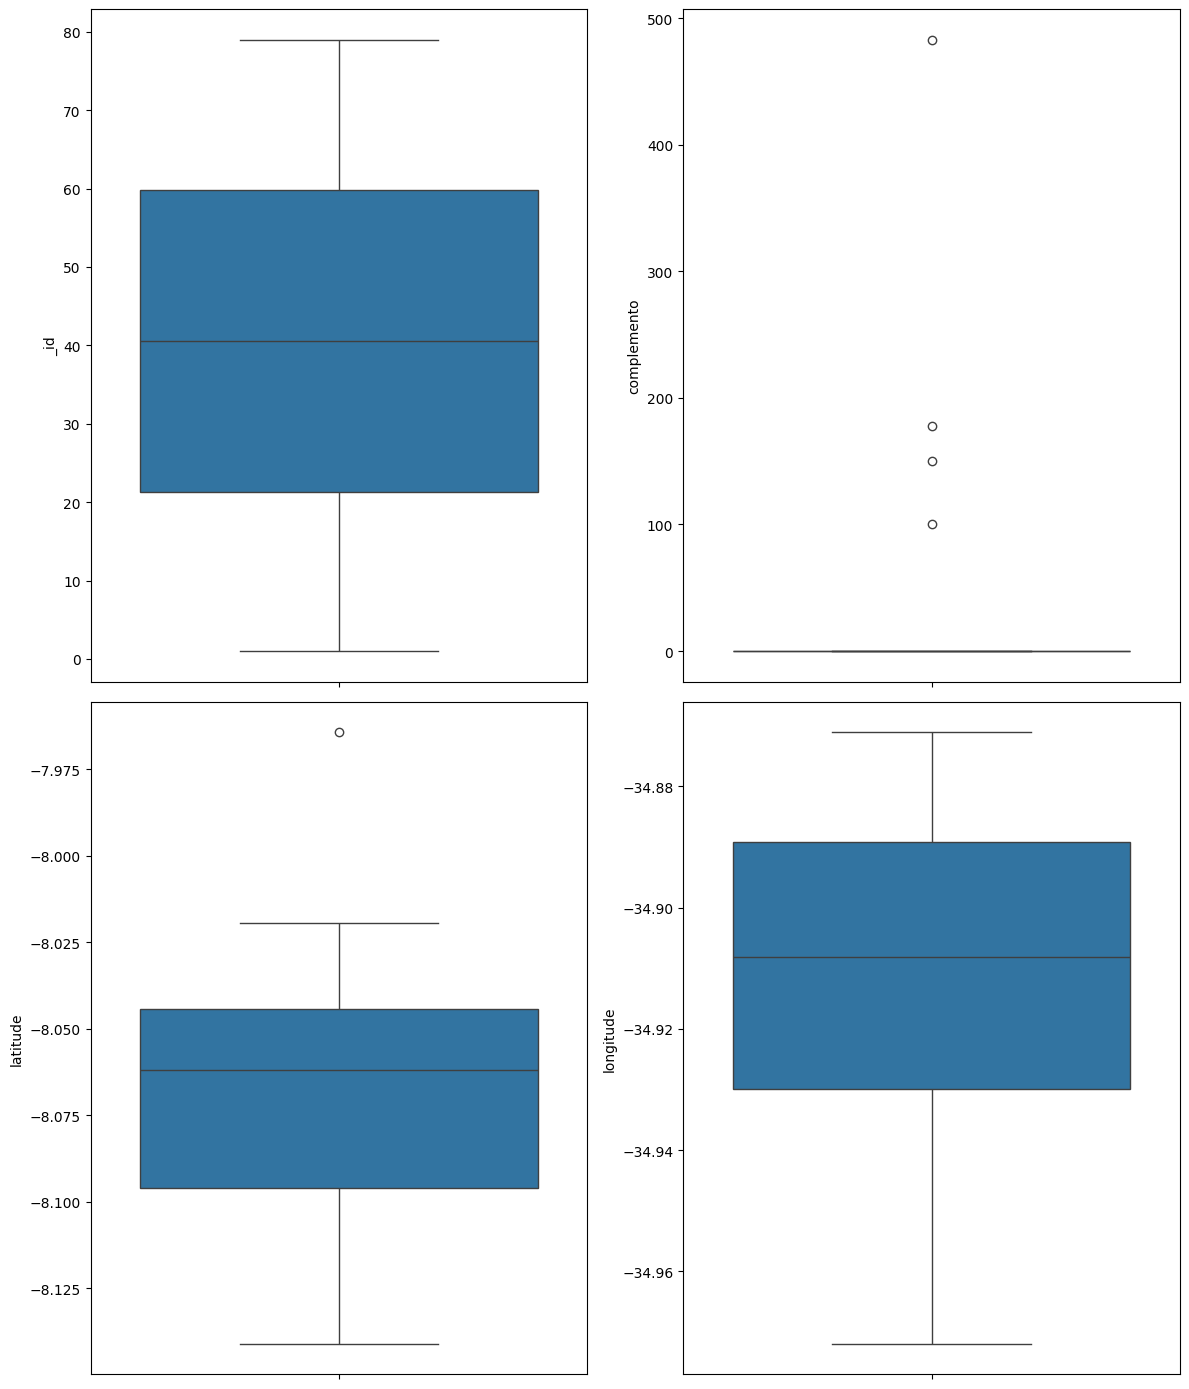

In [120]:
# Para cada variavel que for passando no for, vai montando um grafo
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True

#Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(2,2) #2 linhas e 2 colunas PELO FATO DE HAVER 4 AMOSTRAS

linha = 0
coluna = 0


for i in numeros:
    sns.boxplot(data = df, y = i, ax = axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()



# Boxplots
# Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, 
# e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, 
# o intervalo interquartil(IQR) e outliers para cada variável. 

# Outlier são valores que estão bem discrepantes dentro do conjunto de dados, podem ser para mais ou para menos. 
# Observe nos DOIS ULTIMOS boxplot que há os pontinhos acima das linhas. Esses valores são outliers

# Engenharia de Atributos
<p> A engenharia de atributos em resumo utilizarmos uma variavel existente e extrairmos mais informações dessa variável, podendo gerar novas variáveis para analise a partir desta variável existente.<br>
<p> No exemplo abaixo iremos utilizar a variavel DATA_VENDA e criar variaveis como Ano, Mês e Dia    